Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit Steven Bird, mEwan Klein, and Edward Loper http://www.nltk.org/book/

# Chapter 11 - Managing Linguistic Data

## 11.1 Corpus Structure: A Case Study

### The Structure of TIMIT

NLTK includes a sample from the TIMIT Corpus. You can access its documentation in the usual way, using help(nltk.corpus.timit). Print nltk.corpus.timit.fileids() to see a list of the 160 recorded utterances in the corpus sample.Each item has a phonetic transcription which can be accessed using the phones() method. We can access the corresponding word tokens in the customary way. Both access
methods permit an optional argument offset=True, which includes the start and end offsets of the corresponding span in the audio file.

In [1]:
import nltk

In [2]:
phonetic = nltk.corpus.timit.phones('dr1-fvmh0/sa1')
print(phonetic)

['h#', 'sh', 'iy', 'hv', 'ae', 'dcl', 'y', 'ix', 'dcl', 'd', 'aa', 'kcl', 's', 'ux', 'tcl', 'en', 'gcl', 'g', 'r', 'iy', 's', 'iy', 'w', 'aa', 'sh', 'epi', 'w', 'aa', 'dx', 'ax', 'q', 'ao', 'l', 'y', 'ih', 'ax', 'h#']


In [3]:
nltk.corpus.timit.word_times('dr1-fvmh0/sa1')

[('she', 7812, 10610),
 ('had', 10610, 14496),
 ('your', 14496, 15791),
 ('dark', 15791, 20720),
 ('suit', 20720, 25647),
 ('in', 25647, 26906),
 ('greasy', 26906, 32668),
 ('wash', 32668, 37890),
 ('water', 38531, 42417),
 ('all', 43091, 46052),
 ('year', 46052, 50522)]

In [4]:
timitdict = nltk.corpus.timit.transcription_dict()

In [5]:
timitdict['greasy'] + timitdict['wash'] + timitdict['water']

['g', 'r', 'iy1', 's', 'iy', 'w', 'ao1', 'sh', 'w', 'ao1', 't', 'axr']

In [6]:
phonetic[17:30]

['g', 'r', 'iy', 's', 'iy', 'w', 'aa', 'sh', 'epi', 'w', 'aa', 'dx', 'ax']

In [7]:
nltk.corpus.timit.spkrinfo('dr1-fvmh0')

SpeakerInfo(id='VMH0', sex='F', dr='1', use='TRN', recdate='03/11/86', birthdate='01/08/60', ht='5\'05"', race='WHT', edu='BS', comments='BEST NEW ENGLAND ACCENT SO FAR')

### Notable Design Features

TIMIT illustrates several key features of corpus design. **First, the corpus contains two layers of annotation, at the phonetic and orthographic levels.** In general, a text or speech corpus may be annotated at many different linguistic levels, including morphological, syntactic, and discourse levels. Moreover, even at a given level there may be different labeling schemes or even disagreement amongst annotators, such that we want to represent multiple versions. **A second property of TIMIT is its balance across multiple dimensions of variation, for coverage of dialect regions and diphones.** The inclusion of speaker demographics brings in many more independent variables, that may help to account for variation in the data, and which facilitate later uses of the corpus for purposes that were not envisaged when the corpus was created, such as sociolinguistics. **A third property is that there is a sharp division between the original linguistic event captured as an audio recording, and the annotations of that event.** The same holds true of text corpora, in the sense that the original text usually has an external source, and is considered to be an immutable artifact. Any transformations of that artifact which involve human judgment — even something as simple as tokenization — are subject to later revision, thus it is important to retain the source material in a form that is as close to the original as possible.

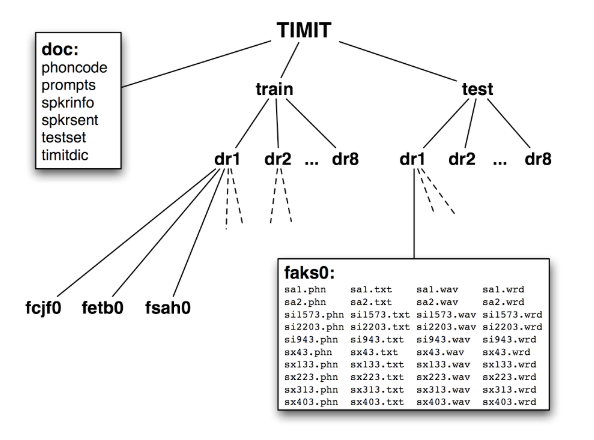

### Fundamental Data Types

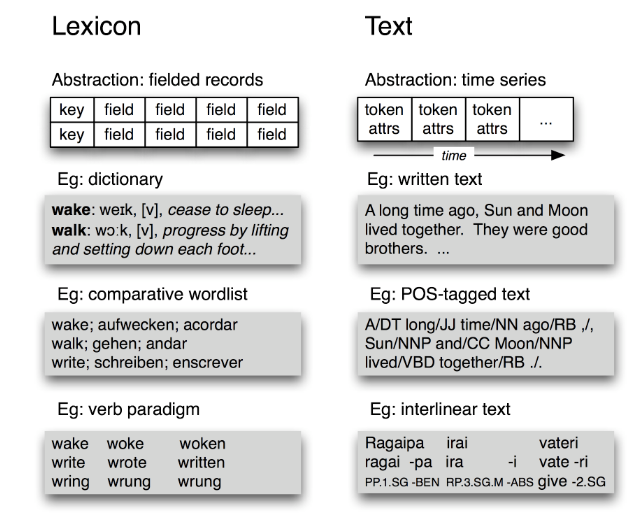

## 11.2 The Life Cycle of a Corpus

Corpora are not born fully-formed, but involve careful preparation and input from many people over an extended period. Raw data needs to be collected, cleaned up, documented, and stored in a systematic structure. Various layers of annotation might be applied, some requiring specialized knowledge of the morphology or syntax of the language. Success at this stage depends on creating an efficient workflow involving appropriate tools and format converters. Quality control procedures can be put in place to find inconsistencies in the annotations, and to ensure the highest possible level of inter-annotator agreement. Because of the scale and complexity of the task, large corpora may take years to prepare, and involve tens or hundreds of person-years of effort. In this section we briefly review the various stages in the life-cycle of a corpus.

### Three Corpus Creation Scenarios

In one type of corpus, the design unfolds over in the course of the creator's explorations. This is the pattern typical of traditional "field linguistics," in which material from elicitation sessions is analyzed as it is gathered, with tomorrow's elicitation often based on questions that arise in analyzing today's. The resulting corpus is then used during subsequent years of research, and may serve as an archival resource indefinitely. Computerization is an obvious boon to work of this type, as exemplified by the popular program Shoebox, now over two decades old and re-released as Toolbox (see 4). Other software tools, even simple word processors and spreadsheets, are routinely used to acquire the data. In the next section we will look at how to extract data from these sources.

Another corpus creation scenario is typical of experimental research where a body of carefully-designed material is collected from a range of human subjects, then analyzed to evaluate a hypothesis or develop a technology. It has become common for such databases to be shared and re-used within a laboratory or company, and often to be published more widely. Corpora of this type are the basis of the "common task" method of research management, which over the past two decades has become the norm in government-funded research programs in language technology. We have already encountered many such corpora in the earlier chapters; we will see how to write Python programs to implement the kinds of curation tasks that are necessary before such corpora are published.

Finally, there are efforts to gather a "reference corpus" for a particular language, such as the American National Corpus (ANC) and the British National Corpus (BNC). Here the goal has been to produce a comprehensive record of the many forms, styles and uses of a language. Apart from the sheer challenge of scale, there is a heavy reliance on automatic annotation tools together with post-editing to fix any errors. However, we can write programs to locate and repair the errors, and also to analyze the corpus for balance.

### Quality Control

Good tools for automatic and manual preparation of data are essential. However the creation of a high-quality corpus depends just as much on such mundane things as **documentation, training, and workflow**. 

**Annotation guidelines define the task and document the markup conventions**. They may be regularly updated to cover difficult cases, along with new rules that are devised to achieve more consistent annotations. 

**Annotators need to be trained** in the procedures, including methods for resolving cases not covered in the guidelines. 

**A workflow needs to be established**, possibly with supporting software, to keep track of which files have been initialized, annotated, validated, manually checked, and so on. There may be multiple layers of annotation, provided by different specialists. Cases of uncertainty or disagreement may require adjudication.

Large annotation tasks require multiple annotators, which raises the problem of achieving consistency. How consistently can a group of annotators perform? We can easily measure consistency by having a portion of the source material independently annotated by two people. This may reveal shortcomings in the guidelines or differing abilities with the annotation task. In cases where quality is paramount, the entire corpus can be annotated twice, and any inconsistencies adjudicated by an expert.

**It is considered best practice to report the inter-annotator agreement that was achieved for a corpus (e.g. by double-annotating 10% of the corpus). This score serves as a helpful upper bound on the expected performance of any automatic system that is trained on this corpus.**

**Caution!**
<div>
Care should be exercised when interpreting an inter-annotator agreement score, since annotation tasks vary greatly in their difficulty. For example, 90% agreement would be a terrible score for part-of-speech tagging, but an exceptional score for semantic role labeling.

The **Kappa** coefficient K measures agreement between two people making category judgments, correcting for expected chance agreement. For example, suppose an item is to be annotated, and four coding options are equally likely. Then two people coding randomly would be expected to agree 25% of the time. Thus, an agreement of 25% will be assigned K = 0, and better levels of agreement will be scaled accordingly. For an agreement of 50%, we would get K = 0.333, as 50 is a third of the way from 25 to 100. Many other agreement measures exist; see help(nltk.metrics.agreement) for details.

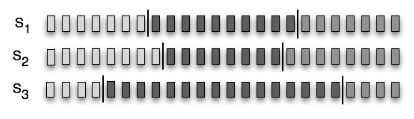

We can also measure the agreement between two independent segmentations of language input, e.g. for tokenization, sentence segmentation, named-entity detection. In 2.1 we see three possible segmentations of a sequence of items which might have been produced by annotators (or programs). Although none of them agree exactly, S1 and S2 are in close agreement, and we would like a suitable measure. 

Windowdiff is a simple algorithm for evaluating the agreement of two segmentations by running a sliding window over the data and awarding partial credit for near misses. If we preprocess our tokens into a sequence of zeros and ones, to record when a token is followed by a boundary, we can represent the segmentations as strings, and apply the windowdiff scorer.

In [8]:
s1 = "00000010000000001000000"
s2 = "00000001000000010000000"
s3 = "00010000000000000001000"

In [9]:
nltk.windowdiff(s1, s1, 3)

0.0

In [10]:
nltk.windowdiff(s1, s2, 3)

0.19047619047619047

In [11]:
nltk.windowdiff(s2, s3, 3)

0.5714285714285714

In the above example, the window had a size of 3. The windowdiff computation slides this window across a pair of strings. At each position it totals up the number of boundaries found inside this window, for both strings, then computes the difference. These differences are then summed. We can increase or shrink the window size to control the sensitivity of the measure.

### Curation vs Evolution

As large corpora are published, researchers are increasingly likely to base their investigations on balanced, focused subsets that were derived from corpora produced for entirely different reasons. For instance, the Switchboard database, originally collected for speaker identification research, has since been used as the basis for published studies in speech recognition, word pronunciation, disfluency, syntax, intonation and discourse structure. The motivations for recycling linguistic corpora include the desire to save time and effort, the desire to work on material available to others for replication, and sometimes a desire to study more naturalistic forms of linguistic behavior than would be possible otherwise. The process of choosing a subset for such a study may count as a non-trivial contribution in itself.

In addition to selecting an appropriate subset of a corpus, this new work could involve reformatting a text file (e.g. converting to XML), renaming files, retokenizing the text, selecting a subset of the data to enrich, and so forth. Multiple research groups might do this work independently, as illustrated in 2.2. At a later date, should someone want to combine sources of information from different versions, the task will probably be extremely onerous.

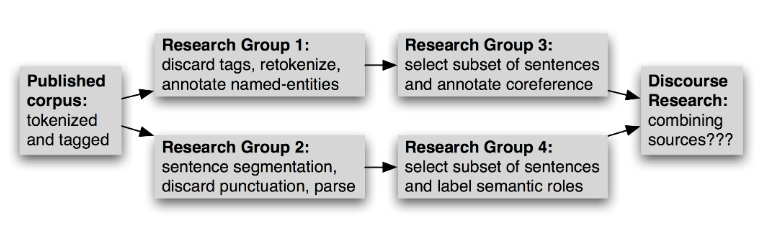

The task of using derived corpora is made even more difficult by the lack of any record about how the derived version was created, and which version is the most up-to-date.

An alternative to this chaotic situation is for a corpus to be centrally curated, and for committees of experts to revise and extend it at periodic intervals, considering submissions from third-parties, and publishing new releases from time to time. Print dictionaries and national corpora may be centrally curated in this way. However, for most corpora this model is simply impractical.

A middle course is for the original corpus publication to have a scheme for identifying any sub-part. Each sentence, tree, or lexical entry, could have a globally unique identifier, and each token, node or field (respectively) could have a relative offset. Annotations, including segmentations, could reference the source using this identifier scheme (a method which is known as standoff annotation). This way, new annotations could be distributed independently of the source, and multiple independent annotations of the same source could be compared and updated without touching the source.

If the corpus publication is provided in multiple versions, the version number or date could be part of the identification scheme. A table of correspondences between identifiers across editions of the corpus would permit any standoff annotations to be updated easily.

**Caution!**
<div>
Sometimes an updated corpus contains revisions of base material that has been externally annotated. Tokens might be split or merged, and constituents may have been rearranged. There may not be a one-to-one correspondence between old and new identifiers. It is better to cause standoff annotations to break on such components of the new version than to silently allow their identifiers to refer to incorrect locations.

## 11.3 Acquiring Data

### Obtaining Data from the Web

The Web is a rich source of data for language analysis purposes. We have already discussed methods for accessing individual files, RSS feeds, and search engine results (see 3.1). However, in some cases we want to obtain large quantities of web text.

The simplest approach is to obtain a published corpus of web text. The ACL Special Interest Group on Web as Corpus (SIGWAC) maintains a list of resources at http://www.sigwac.org.uk/. The advantage of using a well-defined web corpus is that they are documented, stable, and permit reproducible experimentation.

If the desired content is localized to a particular website, there are many utilities for capturing all the accessible contents of a site, such as GNU Wget http://www.gnu.org/software/wget/. For maximal flexibility and control, a web crawler can be used, such as Heritrix http://crawler.archive.org/. Crawlers permit fine-grained control over where to look, which links to follow, and how to organize the results (Croft, Metzler, & Strohman, 2009). For example, if we want to compile a bilingual text collection having corresponding pairs of documents in each language, the crawler needs to detect the structure of the site in order to extract the correspondence between the documents, and it needs to organize the downloaded pages in such a way that the correspondence is captured. It might be tempting to write your own web-crawler, but there are dozens of pitfalls to do with detecting MIME types, converting relative to absolute URLs, avoiding getting trapped in cyclic link structures, dealing with network latencies, avoiding overloading the site or being banned from accessing the site, and so on.

### Obtaining Data from Word Processor Files

Word processing software is often used in the manual preparation of texts and lexicons in projects that have limited computational infrastructure. Such projects often provide templates for data entry, though the word processing software does not ensure that the data is correctly structured. For example, each text may be required to have a title and date. Similarly, each lexical entry may have certain obligatory fields. As the data grows in size and complexity, a larger proportion of time may be spent maintaining its consistency.

How can we extract the content of such files so that we can manipulate it in external programs? Moreover, how can we validate the content of these files to help authors create well-structured data, so that the quality of the data can be maximized in the context of the original authoring process?

Consider a dictionary in which each entry has a part-of-speech field, drawn from a set of 20 possibilities, displayed after the pronunciation field, and rendered in 11-point bold. No conventional word processor has search or macro functions capable of verifying that all part-of-speech fields have been correctly entered and displayed. This task requires exhaustive manual checking. If the word processor permits the document to be saved in a non-proprietary format, such as text, HTML, or XML, we can sometimes write programs to do this checking automatically.

Consider the following fragment of a lexical entry: "sleep [sli:p] **v.i.** *condition of body and mind...*". We can enter this in MSWord, then "Save as Web Page", then inspect the resulting HTML file:

In [12]:
%%file dict.htm
<p class=MsoNormal>sleep
  <span style='mso-spacerun:yes'> </span>
  [<span class=SpellE>sli:p</span>]
  <span style='mso-spacerun:yes'> </span>
  <b><span style='font-size:11.0pt'>v.i.</span></b>
  <span style='mso-spacerun:yes'> </span>
  <i>a condition of body and mind ...<o:p></o:p></i>
</p>

Writing dict.htm


Observe that the entry is represented as an HTML paragraph, using the &lt;p&gt; element, and that the part of speech appears inside a &lt;span style='font-size:11.0pt'&gt; element. The following program defines the set of legal parts-of-speech, legal_pos. Then it extracts all 11-point content from the dict.htm file and stores it in the set used_pos. Observe that the search pattern contains a parenthesized sub-expression; only the material that matches this sub-expression is returned by re.findall. Finally, the program constructs the set of illegal parts-of-speech as used_pos -
legal_pos:

In [13]:
import re

In [14]:
legal_pos = set(['n', 'v.t.', 'v.i.', 'adj', 'det'])
pattern = re.compile(r"'font-size:11.0pt'>([a-z.]+)<")

In [15]:
with open("dict.htm") as f:
    document = f.read()

In [16]:
used_pos = set(re.findall(pattern, document))
illegal_pos = used_pos.difference(legal_pos)
print(list(illegal_pos))

[]


This simple program represents the tip of the iceberg. We can develop sophisticated tools to check the consistency of word processor files, and report errors so that the maintainer of the dictionary can correct the original file *using the original word processor*.

Once we know the data is correctly formatted, we can write other programs to convert the data into a different format. The program in 3.1 strips out the HTML markup using the BeautifulSoup library, extracts the words and their pronunciations, and generates output in "comma-separated value" (CSV) format.

In [17]:
from bs4 import BeautifulSoup

In [18]:
def lexical_data(html_file, encoding="utf-8"):
    SEP = '_ENTRY'
    html = open(html_file, encoding=encoding).read()
    html = re.sub(r'<p', SEP + '<p', html)
    text = BeautifulSoup(html, 'html.parser').get_text()
    text = ' '.join(text.split())
    for entry in text.split(SEP):
        if entry.count(' ') > 2:
            yield entry.split(' ', 3)

In [19]:
import csv

with open("dict1.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(lexical_data("dict.htm"))

In [20]:
!rm dict.htm dict1.csv

### Obtaining Data from Spreadsheets and Databases

Spreadsheets are often used for acquiring wordlists or paradigms. For example, a comparative wordlist may be created using a spreadsheet, with a row for each cognate set, and a column for each language (cf. nltk.corpus.swadesh, and www.rosettaproject.org). Most spreadsheet software can export their data in CSV "comma-separated value" format. As we see below, it is easy for Python programs to access these using the csv module.

Sometimes lexicons are stored in a full-fledged relational database. When properly normalized, these databases can ensure the validity of the data. For example, we can require that all parts-of-speech come from a specified vocabulary by declaring that the part-of-speech field is an enumerated type or a foreign key that references a separate part-of-speech table. However, the relational model requires the structure of the data (the schema) be declared in advance, and this runs counter to the dominant approach to structuring linguistic data, which is highly exploratory. Fields which were assumed to be obligatory and unique often turn out to be optional and repeatable. A relational database can accommodate this when it is fully known in advance, however if it is not, or if just about every property turns out to be optional or repeatable, the relational approach is unworkable.

Nevertheless, when our goal is simply to extract the contents from a database, it is enough to dump out the tables (or SQL query results) in CSV format and load them into our program. Our program might perform a linguistically motivated query which cannot be expressed in SQL, e.g. *select all words that appear in example sentences for which no dictionary entry is provided*. For this task, we would need to extract enough information from a record for it to be uniquely identified, along with the headwords and example sentences. Let's suppose this information was now available in a CSV file dict.csv:

In [21]:
%%file dict.csv
"sleep","sli:p","v.i","a condition of body and mind ..."
"walk","wo:k","v.intr","progress by lifting and setting down each foot ..."
"wake","weik","intrans","cease to sleep"

Writing dict.csv


Now we can express this query as shown below:

In [22]:
import csv

with open('dict.csv') as f:
    lexicon = csv.reader(f)
    pairs = [(lexeme, defn) for (lexeme, _, _, defn) in lexicon]
lexemes, defns = zip(*pairs)
defn_words = set(w for defn in defns for w in defn.split())
print(sorted(defn_words.difference(lexemes)))

['...', 'a', 'and', 'body', 'by', 'cease', 'condition', 'down', 'each', 'foot', 'lifting', 'mind', 'of', 'progress', 'setting', 'to']


This information would then guide the ongoing work to enrich the lexicon, work that updates the content of the relational database.

In [23]:
!rm dict.csv

### Converting Data Formats

Annotated linguistic data rarely arrives in the most convenient format, and it is often necessary to perform various kinds of format conversion. Converting between character encodings has already been discussed (see 3.3). Here we focus on the structure of the data.

In the simplest case, the input and output formats are isomorphic. For instance, we might be converting lexical data from Toolbox format to XML, and it is straightforward to transliterate the entries one at a time (4). The structure of the data is reflected in the structure of the required program: a for loop whose body takes care of a single entry.

In another common case, the output is a digested form of the input, such as an inverted file index. Here it is necessary to build an index structure in memory (see 4.8), then write it to a file in the desired format. The following example constructs an index that maps the words of a dictionary definition to the corresponding lexeme [1] for each lexical entry [2], having tokenized the definition text [3], and discarded short words [4]. Once the index has been constructed we open a file and then iterate over the index entries, to write out the lines in the required format [5].

In [24]:
idx = nltk.Index((defn_word, lexeme)
                 for (lexeme, defn) in pairs
                 for defn_word in nltk.word_tokenize(defn)
                 if len(defn_word) > 3)

In [25]:
sorted(idx)

['body',
 'cease',
 'condition',
 'down',
 'each',
 'foot',
 'lifting',
 'mind',
 'progress',
 'setting',
 'sleep']

In [26]:
with open("dict.idx", "w") as idx_file:
    for word in sorted(idx):
        idx_words = ', '.join(idx[word])
        idx_line = "{}: {}".format(word, idx_words)
        print(idx_line, file=idx_file)

The resulting file dict.idx contains the following lines. (With a larger dictionary we would expect to find multiple lexemes listed for each index entry.)

In [27]:
!cat dict.idx && rm dict.idx

body: sleep
cease: wake
condition: sleep
down: walk
each: walk
foot: walk
lifting: walk
mind: sleep
progress: walk
setting: walk
sleep: wake


In some cases, the input and output data both consist of two or more dimensions. For instance, the input might be a set of files, each containing a single column of word frequency data. The required output might be a two-dimensional table in which the original columns appear as rows. In such cases we populate an internal data structure by filling up one column at a time, then read off the data one row at a time as we write data to the output file.

In the most vexing cases, the source and target formats have slightly different coverage of the domain, and information is unavoidably lost when translating between them. For example, we could combine multiple Toolbox files to create a single CSV file containing a comparative wordlist, loosing all but the \lx field of the input files. If the CSV file was later modified, it would be a labor-intensive process to inject the changes into the original Toolbox files. A partial solution to this "round-tripping" problem is to associate explicit identifiers each linguistic object, and to propagate the identifiers with the objects.

### Deciding Which Layers of Annotation to Include

Published corpora vary greatly in the richness of the information they contain. At a minimum, a corpus will typically contain at least a sequence of sound or orthographic symbols. At the other end of the spectrum, a corpus could contain a large amount of information about the syntactic structure, morphology, prosody, and semantic content of every sentence, plus annotation of discourse relations or dialogue acts. These extra layers of annotation may be just what someone needs for performing a particular data analysis task. For example, it may be much easier to find a given linguistic pattern if we can search for specific syntactic structures; and it may be easier to categorize a linguistic pattern if every word has been tagged with its sense. Here are some commonly provided annotation layers:

- Word Tokenization: The orthographic form of text does not unambiguously identify its tokens. A tokenized and normalized version, in addition to the conventional orthographic version, may be a very convenient resource.
- Sentence Segmentation: As we saw in 3, sentence segmentation can be more difficult than it seems. Some corpora therefore use explicit annotations to mark sentence segmentation.
- Paragraph Segmentation: Paragraphs and other structural elements (headings, chapters, etc.) may be explicitly annotated.
- Part of Speech: The syntactic category of each word in a document.
- Syntactic Structure: A tree structure showing the constituent structure of a sentence.
- Shallow Semantics: Named entity and coreference annotations, semantic role labels.
- Dialogue and Discourse: dialogue act tags, rhetorical structure

Unfortunately, there is not much consistency between existing corpora in how they represent their annotations. However, two general classes of annotation representation should be distinguished. **Inline annotation** modifies the original document by inserting special symbols or control sequences that carry the annotated information. For example, when part-of-speech tagging a document, the string "fly" might be replaced with the string "fly/NN", to indicate that the word fly is a noun in this context. In contrast, **standoff annotation** does not modify the original document, but instead creates a new file that adds annotation information using pointers that reference the original document. For example, this new document might contain the string "<token id=8 pos='NN'/>", to indicate that token 8 is a noun. (We would want to be sure that the tokenization itself was not subject to change, since it would cause such references to break silently.)

### Standards and Tools

For a corpus to be widely useful, it needs to be available in a widely supported format. However, the cutting edge of NLP research depends on new kinds of annotations, which by definition are not widely supported. In general, adequate tools for creation, publication and use of linguistic data are not widely available. Most projects must develop their own set of tools for internal use, which is no help to others who lack the necessary resources. Furthermore, we do not have adequate, generally-accepted standards for expressing the structure and content of corpora. Without such standards, general-purpose tools are impossible — though at the same time, without available tools, adequate standards are unlikely to be developed, used and accepted.

One response to this situation has been to forge ahead with developing a generic format which is sufficiently expressive to capture a wide variety of annotation types (see 8 for examples). The challenge for NLP is to write programs that cope with the generality of such formats. For example, if the programming task involves tree data, and the file format permits arbitrary directed graphs, then input data must be validated to check for tree properties such as rootedness, connectedness, and acyclicity. If the input files contain other layers of annotation, the program would need to know how to ignore them when the data was loaded, but not invalidate or obliterate those layers when the tree data was saved back to the file.

Another response has been to write one-off scripts to manipulate corpus formats; such scripts litter the filespaces of many NLP researchers. NLTK's corpus readers are a more systematic approach, founded on the premise that the work of parsing a corpus format should only be done once (per programming language).

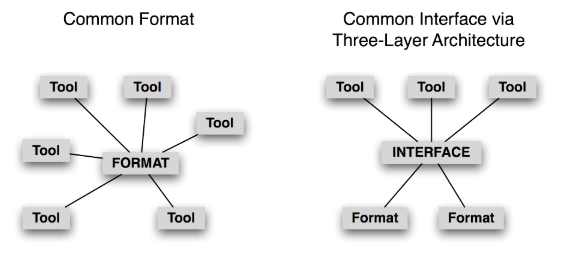

Instead of focussing on a common format, we believe it is more promising to develop a common interface (cf. nltk.corpus). Consider the case of treebanks, an important corpus type for work in NLP. There are many ways to store a phrase structure tree in a file. We can use nested parentheses, or nested XML elements, or a dependency notation with a (child-id, parent-id) pair on each line, or an XML version of the dependency notation, etc. However, in each case the logical structure is almost the same. It is much easier to devise a common interface that allows application programmers to write code to access tree data using methods such as children(), leaves(), depth(), and so forth. Note that this approach follows accepted practice within computer science, viz. abstract data types, object oriented design, and the three layer architecture (3.2). The last of these — from the world of relational databases — allows end-user applications to use a common model (the "relational model") and a common language (SQL), to abstract away from the idiosyncrasies of file storage, and allowing innovations in filesystem technologies to occur without disturbing end-user applications. In the same way, a common corpus interface insulates application programs from data formats.

**In this context, when creating a new corpus for dissemination, it is expedient to use an existing widely-used format wherever possible. When this is not possible, the corpus could be accompanied with software — such as an nltk.corpus module — that supports existing interface methods.**

### Special Considerations when Working with Endangered Languages

The importance of language to science and the arts is matched in significance by the cultural treasure embodied in language. Each of the world's ~7,000 human languages is rich in unique respects, in its oral histories and creation legends, down to its grammatical constructions and its very words and their nuances of meaning. Threatened remnant cultures have words to distinguish plant subspecies according to therapeutic uses that are unknown to science. Languages evolve over time as they come into contact with each other, and each one provides a unique window onto human pre-history. In many parts of the world, small linguistic variations from one town to the next add up to a completely different language in the space of a half-hour drive. For its breathtaking complexity and diversity, human language is as a colorful tapestry stretching through time and space.

However, most of the world's languages face extinction. In response to this, many linguists are hard at work documenting the languages, constructing rich records of this important facet of the world's linguistic heritage. What can the field of NLP offer to help with this effort? Developing taggers, parsers, named-entity recognizers, etc, is not an early priority, and there is usually insufficient data for developing such tools in any case. Instead, the most frequently voiced need is to have better tools for collecting and curating data, with a focus on texts and lexicons.

On the face of things, it should be a straightforward matter to start collecting texts in an endangered language. Even if we ignore vexed issues such as who owns the texts, and sensitivities surrounding cultural knowledge contained in the texts, there is the obvious practical issue of transcription. Most languages lack a standard orthography. When a language has no literary tradition, the conventions of spelling and punctuation are not well-established. Therefore it is common practice to create a lexicon in tandem with a text collection, continually updating the lexicon as new words appear in the texts. This work could be done using a text processor (for the texts) and a spreadsheet (for the lexicon). Better still, SIL's free linguistic software Toolbox and Fieldworks provide sophisticated support for integrated creation of texts and lexicons.

When speakers of the language in question are trained to enter texts themselves, a common obstacle is an overriding concern for correct spelling. Having a lexicon greatly helps this process, but we need to have lookup methods that do not assume someone can determine the citation form of an arbitrary word. The problem may be acute for languages having a complex morphology that includes prefixes. In such cases it helps to tag lexical items with semantic domains, and to permit lookup by semantic domain or by gloss.

Permitting lookup by pronunciation similarity is also a big help. Here's a simple demonstration of how to do this. The first step is to identify confusible letter sequences, and map complex versions to simpler versions. We might also notice that the relative order of letters within a cluster of consonants is a source of spelling errors, and so we normalize the order of consonants.

In [28]:
mappings = [('ph', 'f'), ('ght', 't'), ('^kn', 'n'), ('qu', 'kw'),
            ('[aeiou]+', 'a'), (r'(.)\1', r'\1')]

In [29]:
def signature(word):
    for patt, repl in mappings:
        word = re.sub(patt, repl, word)
    pieces = re.findall('[^aeiou]+', word)
    return ''.join(char 
                   for piece in pieces 
                   for char in sorted(piece))[:8]

In [30]:
signature('illefent')

'lfnt'

In [31]:
signature('ebsekwieous')

'bskws'

In [32]:
signature('nuculerr')

'nclr'

In [33]:
signature('dcaaazx')

'cdxz'

Next, we create a mapping from signatures to words, for all the words in our lexicon. We can use this to get candidate corrections for a given input word (but we must first compute that word's signature).

In [34]:
signatures = nltk.Index((signature(w), w) 
                        for w in nltk.corpus.words.words())
signatures[signature('nuculerr')]

['anicular',
 'inocular',
 'nucellar',
 'nuclear',
 'unicolor',
 'uniocular',
 'unocular']

Finally, we should rank the results in terms of similarity with the original word. This is done by the function rank(). The only remaining function provides a simple interface to the user:

In [35]:
def rank(word, wordlist):
    ranked = sorted((nltk.edit_distance(word, w), w) for w in wordlist)
    return [word for (_, word) in ranked]

In [36]:
def fuzzy_spell(word):
    sig = signature(word)
    if sig in signatures:
        return rank(word, signatures[sig])
    else:
        return []

In [37]:
fuzzy_spell('illefent')

['olefiant', 'elephant', 'oliphant', 'elephanta']

In [38]:
fuzzy_spell('ebsekwieous')

['obsequious']

In [39]:
fuzzy_spell('nucular')

['anicular',
 'inocular',
 'nucellar',
 'nuclear',
 'unocular',
 'uniocular',
 'unicolor']

This is just one illustration where a simple program can facilitate access to lexical data in a context where the writing system of a language may not be standardized, or where users of the language may not have a good command of spellings. Other simple applications of NLP in this area include: building indexes to facilitate access to data, gleaning wordlists from texts, locating examples of word usage in constructing a lexicon, detecting prevalent or exceptional patterns in poorly understood data, and performing specialized validation on data created using various linguistic software tools. We will return to the last of these in 5.

## 11.4 Working with XML

The Extensible Markup Language (XML) provides a framework for designing domain-specific markup languages. It is sometimes used for representing annotated text and for lexical resources. Unlike HTML with its predefined tags, XML permits us to make up our own tags. Unlike a database, XML permits us to create data without first specifying its structure, and it permits us to have optional and repeatable elements. In this section we briefly review some features of XML that are relevant for representing linguistic data, and show how to access data stored in XML files using Python programs.

### Using XML for Linguistic Structures

Thanks to its flexibility and extensibility, XML is a natural choice for representing linguistic structures. Here's an example of a simple lexical entry.

In [40]:
%%file example1.xml
<entry>
  <headword>whale</headword>
  <pos>noun</pos>
  <gloss>any of the larger cetacean mammals having a streamlined
    body and breathing through a blowhole on the head</gloss>
</entry>

Writing example1.xml


It consists of a series of XML tags enclosed in angle brackets. Each opening tag, like <gloss> is matched with a closing tag, like </gloss>; together they constitute an **XML element**. The above example has been laid out nicely using whitespace, but it could equally have been put on a single, long line. Our approach to processing XML will usually not be sensitive to whitespace. In order for XML to be **well formed**, all opening tags must have corresponding closing tags, at the same level of nesting (i.e. the XML document must be a well-formed tree).

XML permits us to repeat elements, e.g. to add another gloss field as we see below. We will use different whitespace to underscore the point that layout does not matter.

In [41]:
%%file example2.xml
<entry><headword>whale</headword><pos>noun</pos><gloss>any of the
larger cetacean mammals having a streamlined body and breathing
through a blowhole on the head</gloss><gloss>a very large person;
impressive in size or qualities</gloss></entry>

Writing example2.xml


A further step might be to link our lexicon to some external resource, such as WordNet, using external identifiers. In (4) we group the gloss and a synset identifier inside a new element which we have called "sense".

In [42]:
%%file example3.xml
<entry>
  <headword>whale</headword>
  <pos>noun</pos>
  <sense>
    <gloss>any of the larger cetacean mammals having a streamlined
      body and breathing through a blowhole on the head</gloss>
    <synset>whale.n.02</synset>
  </sense>
  <sense>
    <gloss>a very large person; impressive in size or qualities</gloss>
    <synset>giant.n.04</synset>
  </sense>
</entry>

Writing example3.xml


Alternatively, we could have represented the synset identifier using an XML attribute, without the need for any nested structure, as in (5).

In [43]:
%%file example4.xml
<entry>
  <headword>whale</headword>
  <pos>noun</pos>
  <gloss synset="whale.n.02">any of the larger cetacean mammals having
      a streamlined body and breathing through a blowhole on the head</gloss>
  <gloss synset="giant.n.04">a very large person; impressive in size or
      qualities</gloss>
</entry>

Writing example4.xml


This illustrates some of the flexibility of XML. If it seems somewhat arbitrary that's because it is! Following the rules of XML we can invent new attribute names, and nest them as deeply as we like. We can repeat elements, leave them out, and put them in a different order each time. We can have fields whose presence depends on the value of some other field, e.g. if the part of speech is "verb", then the entry can have a past_tense element to hold the past tense of the verb, but if the part of speech is "noun" no past_tense element is permitted. To impose some order over all this freedom, we can constrain the structure of an XML file using a "schema," which is a declaration akin to a context free grammar. Tools exist for testing the **validity** of an XML file with respect to a schema.

In [44]:
!rm example*.xml

### The Role of XML

We can use XML to represent many kinds of linguistic information. However, the flexibility comes at a price. Each time we introduce a complication, such as by permitting an element to be optional or repeated, we make more work for any program that accesses the data. We also make it more difficult to check the validity of the data, or to interrogate the data using one of the XML query languages.

Thus, using XML to represent linguistic structures does not magically solve the data modeling problem. We still have to work out how to structure the data, then define that structure with a schema, and then write programs to read and write the format and convert it to other formats. Similarly, we still need to follow some standard principles concerning data normalization. It is wise to avoid making duplicate copies of the same information, so that we don't end up with inconsistent data when only one copy is changed. For example, a cross-reference that was represented as <xref>headword</xref> would duplicate the storage of the headword of some other lexical entry, and the link would break if the copy of the string at the other location was modified. Existential dependencies between information types need to be modeled, so that we can't create elements without a home. For example, if sense definitions cannot exist independently of a lexical entry, the sense element can be nested inside the entry element. Many-to-many relations need to be abstracted out of hierarchical structures. For example, if a word can have many corresponding senses, and a sense can have several corresponding words, then both words and senses must be enumerated separately, as must the list of (word, sense) pairings. This complex structure might even be split across three separate XML files.

As we can see, although XML provides us with a convenient format accompanied by an extensive collection of tools, it offers no panacea.

### The ElementTree Interface

Python's ElementTree module provides a convenient way to access data stored in XML files. ElementTree is part of Python's standard library (since Python 2.5), and is also provided as part of NLTK in case you are using Python 2.4.

We will illustrate the use of ElementTree using a collection of Shakespeare plays that have been formatted using XML. Let's load the XML file and inspect the raw data, first at the top of the file [1], where we see some XML headers and the name of a schema called play.dtd, followed by the **root element** PLAY. We pick it up again at the start of Act 1 [2]. (Some blank lines have been omitted from the output.)

In [45]:
merchant_file = nltk.data.find('corpora/shakespeare/merchant.xml')
with open(merchant_file) as f:
    raw = f.read()
print(raw[:163])

<?xml version="1.0"?>
<?xml-stylesheet type="text/css" href="shakes.css"?>
<!-- <!DOCTYPE PLAY SYSTEM "play.dtd"> -->

<PLAY>
<TITLE>The Merchant of Venice</TITLE>


In [46]:
print(raw[1789:2006])

<TITLE>ACT I</TITLE>

<SCENE><TITLE>SCENE I.  Venice. A street.</TITLE>
<STAGEDIR>Enter ANTONIO, SALARINO, and SALANIO</STAGEDIR>

<SPEECH>
<SPEAKER>ANTONIO</SPEAKER>
<LINE>In sooth, I know not why I am so sad:</LINE>


We have just accessed the XML data as a string. As we can see, the string at the start of Act 1 contains XML tags for title, scene, stage directions, and so forth.

The next step is to process the file contents as structured XML data, using ElementTree. We are processing a file (a multi-line string) and building a tree, so its not surprising that the method name is parse [1]. The variable merchant contains an XML element PLAY [2]. This element has internal structure; we can use an index to get its first child, a TITLE element [3]. We can also see the text content of this element, the title of the play [4]. To get a list of all the child elements, we use the getchildren() method [5].

In [47]:
from xml.etree.ElementTree import ElementTree

In [48]:
merchant = ElementTree().parse(merchant_file)
merchant

<Element 'PLAY' at 0x7f24e78b8f48>

In [49]:
merchant[0]

<Element 'TITLE' at 0x7f24e78b8f98>

In [50]:
merchant[0].text

'The Merchant of Venice'

In [51]:
# merchant.getchildren() - deprecated
list(merchant)

[<Element 'TITLE' at 0x7f24e78b8f98>,
 <Element 'PERSONAE' at 0x7f24e784a048>,
 <Element 'SCNDESCR' at 0x7f24e784ab38>,
 <Element 'PLAYSUBT' at 0x7f24e784ab88>,
 <Element 'ACT' at 0x7f24e784abd8>,
 <Element 'ACT' at 0x7f24e7865ea8>,
 <Element 'ACT' at 0x7f24e7817728>,
 <Element 'ACT' at 0x7f24e7844cc8>,
 <Element 'ACT' at 0x7f24e77ea728>]

The play consists of a title, the personae, a scene description, a subtitle, and five acts. Each act has a title and some scenes, and each scene consists of speeches which are made up of lines, a structure with four levels of nesting. Let's dig down into Act IV:

In [52]:
merchant[-2][0].text

'ACT IV'

In [53]:
merchant[-2][1]

<Element 'SCENE' at 0x7f24e7844d68>

In [54]:
merchant[-2][1][0].text

'SCENE I.  Venice. A court of justice.'

In [55]:
merchant[-2][1][54]

<Element 'SPEECH' at 0x7f24e77cfe58>

In [56]:
merchant[-2][1][54][0]

<Element 'SPEAKER' at 0x7f24e77cfea8>

In [57]:
merchant[-2][1][54][0].text

'PORTIA'

In [58]:
merchant[-2][1][54][1]

<Element 'LINE' at 0x7f24e77cfef8>

In [59]:
merchant[-2][1][54][1].text

"The quality of mercy is not strain'd,"

Although we can access the entire tree this way, it is more convenient to search for sub-elements with particular names. Recall that the elements at the top level have several types. We can iterate over just the types we are interested in (such as the acts), using merchant.findall('ACT'). Here's an example of doing such tag-specific searches at every level of nesting:

In [60]:
for i, act in enumerate(merchant.findall('ACT')):
    for j, scene in enumerate(act.findall('SCENE')):
        for k, speech in enumerate(scene.findall('SPEECH')):
            for line in speech.findall('LINE'):
                if 'music' in str(line.text):
                    print("Act %d Scene %d Speech %d: %s" % (i+1, j+1, k+1, line.text))

Act 3 Scene 2 Speech 9: Let music sound while he doth make his choice;
Act 3 Scene 2 Speech 9: Fading in music: that the comparison
Act 3 Scene 2 Speech 9: And what is music then? Then music is
Act 5 Scene 1 Speech 23: And bring your music forth into the air.
Act 5 Scene 1 Speech 23: Here will we sit and let the sounds of music
Act 5 Scene 1 Speech 23: And draw her home with music.
Act 5 Scene 1 Speech 24: I am never merry when I hear sweet music.
Act 5 Scene 1 Speech 25: Or any air of music touch their ears,
Act 5 Scene 1 Speech 25: By the sweet power of music: therefore the poet
Act 5 Scene 1 Speech 25: But music for the time doth change his nature.
Act 5 Scene 1 Speech 25: The man that hath no music in himself,
Act 5 Scene 1 Speech 25: Let no such man be trusted. Mark the music.
Act 5 Scene 1 Speech 29: It is your music, madam, of the house.
Act 5 Scene 1 Speech 32: No better a musician than the wren.


Instead of navigating each step of the way down the hierarchy, we can search for particular embedded elements. For example, let's examine the sequence of speakers. We can use a frequency distribution to see who has the most to say:

In [61]:
from collections import Counter

In [62]:
speaker_seq = [s.text for s in merchant.findall('ACT/SCENE/SPEECH/SPEAKER')]
speaker_freq = Counter(speaker_seq)
top5 = speaker_freq.most_common(5)
top5

[('PORTIA', 117),
 ('SHYLOCK', 79),
 ('BASSANIO', 73),
 ('GRATIANO', 48),
 ('ANTONIO', 47)]

We can also look for patterns in who follows who in the dialogues. Since there's 23 speakers, we need to reduce the "vocabulary" to a manageable size first, using the method described in 3.

In [63]:
from collections import defaultdict

In [64]:
abbreviate = defaultdict(lambda: 'OTH')
for speaker, _ in top5:
    abbreviate[speaker] = speaker[:4]

In [65]:
speaker_seq2 = [abbreviate[speaker] for speaker in speaker_seq]
cfd = nltk.ConditionalFreqDist(nltk.bigrams(speaker_seq2))
cfd.tabulate()

     ANTO BASS GRAT  OTH PORT SHYL 
ANTO    0   11    4   11    9   12 
BASS   10    0   11   10   26   16 
GRAT    6    8    0   19    9    5 
 OTH    8   16   18  153   52   25 
PORT    7   23   13   53    0   21 
SHYL   15   15    2   26   21    0 


Ignoring the entries for exchanges between people other than the top 5 (labeled OTH), the largest value suggests that Portia and Bassanio have the most frequent interactions.

### Using ElementTree for Accessing Toolbox Data

In 4 we saw a simple interface for accessing Toolbox data, a popular and well-established format used by linguists for managing data. In this section we discuss a variety of techniques for manipulating Toolbox data in ways that are not supported by the Toolbox software. The methods we discuss could be applied to other record-structured data, regardless of the actual file format.

We can use the toolbox.xml() method to access a Toolbox file and load it into an elementtree object. This file contains a lexicon for the Rotokas language of Papua New Guinea.

In [66]:
from nltk.corpus import toolbox

lexicon = toolbox.xml('rotokas.dic')

There are two ways to access the contents of the lexicon object, by indexes and by paths. Indexes use the familiar syntax, thus lexicon[3] returns entry number 3 (which is actually the fourth entry counting from zero); lexicon[3][0] returns its first field:

In [67]:
lexicon[3]

<Element 'record' at 0x7f24e77a1ae8>

In [68]:
lexicon[3][0]

<Element 'lx' at 0x7f24e77a1b38>

In [69]:
lexicon[3][0].tag

'lx'

In [70]:
lexicon[3][0].text

'kaa'

The second way to access the contents of the lexicon object uses paths. The lexicon is a series of record objects, each containing a series of field objects, such as lx and ps. We can conveniently address all of the lexemes using the path record/lx. Here we use the findall() function to search for any matches to the path record/lx, and we access the text content of the element, normalizing it to lowercase.

In [71]:
[lexeme.text.lower() for lexeme in lexicon.findall('record/lx')][:10]

['kaa',
 'kaa',
 'kaa',
 'kaakaaro',
 'kaakaaviko',
 'kaakaavo',
 'kaakaoko',
 'kaakasi',
 'kaakau',
 'kaakauko']

Let's view the Toolbox data in XML format. The write() method of ElementTree expects a file object. We usually create one of these using Python's built-in open() function. In order to see the output displayed on the screen, we can use a special pre-defined file object called stdout [1] (standard output), defined in Python's sys module.

In [72]:
import sys

In [73]:
from nltk.util import elementtree_indent
from xml.etree.ElementTree import ElementTree

In [74]:
elementtree_indent(lexicon)
tree = ElementTree(lexicon[3])
tree.write(sys.stdout, encoding='utf-8')

<record>
    <lx>kaa</lx>
    <ps>N</ps>
    <pt>MASC</pt>
    <cl>isi</cl>
    <ge>cooking banana</ge>
    <tkp>banana bilong kukim</tkp>
    <pt>itoo</pt>
    <sf>FLORA</sf>
    <dt>12/Aug/2005</dt>
    <ex>Taeavi iria kaa isi kovopaueva kaparapasia.</ex>
    <xp>Taeavi i bin planim gaden banana bilong kukim tasol long paia.</xp>
    <xe>Taeavi planted banana in order to cook it.</xe>
  </record>

### Formatting Entries

We can use the same idea we saw above to generate HTML tables instead of plain text. This would be useful for publishing a Toolbox lexicon on the web. It produces HTML elements &lt;table&gt;, &lt;tr&gt; (table row), and &lt;td&gt; (table data).

In [75]:
html = "<table>\n"
for entry in lexicon[70:80]:
    lx = entry.findtext('lx')
    ps = entry.findtext('ps')
    ge = entry.findtext('ge')
    html += "  <tr><td>%s</td><td>%s</td><td>%s</td></tr>\n" % (lx, ps, ge)
html += "</table>"
print(html)

<table>
  <tr><td>kakae</td><td>???</td><td>small</td></tr>
  <tr><td>kakae</td><td>CLASS</td><td>child</td></tr>
  <tr><td>kakaevira</td><td>ADV</td><td>small-like</td></tr>
  <tr><td>kakapikoa</td><td>???</td><td>small</td></tr>
  <tr><td>kakapikoto</td><td>N</td><td>newborn baby</td></tr>
  <tr><td>kakapu</td><td>V</td><td>place in sling for purpose of carrying</td></tr>
  <tr><td>kakapua</td><td>N</td><td>sling for lifting</td></tr>
  <tr><td>kakara</td><td>N</td><td>arm band</td></tr>
  <tr><td>Kakarapaia</td><td>N</td><td>village name</td></tr>
  <tr><td>kakarau</td><td>N</td><td>frog</td></tr>
</table>


In [76]:
from IPython.display import HTML

In [77]:
HTML(html)

kakae,???,small
kakae,CLASS,child
kakaevira,ADV,small-like
kakapikoa,???,small
kakapikoto,N,newborn baby
kakapu,V,place in sling for purpose of carrying
kakapua,N,sling for lifting
kakara,N,arm band
Kakarapaia,N,village name
kakarau,N,frog


## 11.5 Working with Toolbox Data

Given the popularity of Toolbox amongst linguists, we will discuss some further methods for working with Toolbox data. Many of the methods discussed in previous chapters, such as counting, building frequency distributions, tabulating co-occurrences, can be applied to the content of Toolbox entries. For example, we can trivially compute the average number of fields for each entry:

In [78]:
from nltk.corpus import toolbox

In [79]:
lexicon = toolbox.xml('rotokas.dic')
sum(len(entry) for entry in lexicon) / len(lexicon)

13.635955056179775

In this section we will discuss two tasks that arise in the context of documentary linguistics, neither of which is supported by the Toolbox software.

### Adding a Field to Each Entry

It is often convenient to add new fields that are derived automatically from existing ones. Such fields often facilitate search and analysis. For instance, in 5.1 we define a function cv() which maps a string of consonants and vowels to the corresponding CV sequence, e.g. kakapua would map to CVCVCVV. This mapping has four steps. First, the string is converted to lowercase, then we replace any non-alphabetic characters [^a-z] with an underscore. Next, we replace all vowels with V. Finally, anything that is not a V or an underscore must be a consonant, so we replace it with a C. Now, we can scan the lexicon and add a new cv field after every lx field. 5.1 shows what this does to a particular entry; note the last line of output, which shows the new cv field.

In [80]:
from xml.etree.ElementTree import SubElement

In [81]:
# Adding a new cv field to a lexical entry
def cv(s):
    s = s.lower()
    s = re.sub(r'[^a-z]', r'_', s)
    s = re.sub(r'[aeiou]', r'V', s)
    s = re.sub(r'[^V_]', r'C', s)
    return (s)

In [82]:
def add_cv_field(entry):
    for field in entry:
        if field.tag == 'lx':
            cv_field = SubElement(entry, 'cv')
            cv_field.text = cv(field.text)

In [87]:
lexicon = toolbox.xml('rotokas.dic')
add_cv_field(lexicon[53])
print(nltk.toolbox.to_sfm_string(lexicon[53]))

\lx kaeviro
\ps V
\pt A
\ge lift off
\ge take off
\tkp go antap
\sc MOTION
\vx 1
\nt used to describe action of plane
\dt 03/Jun/2005
\ex Pita kaeviroroe kepa kekesia oa vuripierevo kiuvu.
\xp Pita i go antap na lukim haus win i bagarapim.
\xe Peter went to look at the house that the wind destroyed.
\cv CVVCVCV



**Note:**<div>
If a Toolbox file is being continually updated, the program in code-add-cv-field will need to be run more than once. It would be possible to modify add_cv_field() to modify the contents of an existing entry. However, it is a safer practice to use such programs to create enriched files for the purpose of data analysis, without replacing the manually curated source files.

### Validating a Toolbox Lexicon

Many lexicons in Toolbox format do not conform to any particular schema. Some entries may include extra fields, or may order existing fields in a new way. Manually inspecting thousands of lexical entries is not practicable. However, we can easily identify frequent field sequences, with the help of a Counter:

In [88]:
from collections import Counter

In [90]:
field_sequences = Counter(':'.join(field.tag for field in entry) 
                          for entry in lexicon)
field_sequences.most_common(n=10)

[('lx:ps:pt:ge:tkp:dt:ex:xp:xe', 41),
 ('lx:rt:ps:pt:ge:tkp:dt:ex:xp:xe', 37),
 ('lx:rt:ps:pt:ge:tkp:dt:ex:xp:xe:ex:xp:xe', 27),
 ('lx:ps:pt:ge:tkp:nt:dt:ex:xp:xe', 20),
 ('lx:ps:pt:ge:tkp:nt:dt:ex:xp:xe:ex:xp:xe', 17),
 ('lx:ps:pt:ge:tkp:dt:ex:xp:xe:ex:xp:xe', 16),
 ('lx:rt:ps:pt:ge:ge:tkp:dt:ex:xp:xe:ex:xp:xe', 12),
 ('lx:ps:pt:ge:tkp:nt:sf:dt:ex:xp:xe', 9),
 ('lx:ps:pt:ge:ge:tkp:dt:ex:xp:xe', 9),
 ('lx:rt:ps:pt:ge:tkp:dt:ex:xp:xe:ex:xp:xe:ex:xp:xe', 9)]

After inspecting these field sequences we could devise a context free grammar for lexical entries. The grammar in 5.2 uses the CFG format we saw in 8.. Such a grammar models the implicit nested structure of Toolbox entries, and builds a tree structure in which the leaves of the tree are individual field names. Finally, we iterate over the entries and report their conformance with the grammar, as shown in 5.2. Those that are accepted by the grammar are prefixed with a '+' [1], and those that are rejected are prefixed with a '-' [2]. During the process of developing such a grammar it helps to filter out some of the tags [3].

In [95]:
grammar = nltk.CFG.fromstring('''
    S -> Head PS Glosses Comment Date Sem_Field Examples
    Head -> Lexeme Root
    Lexeme -> "lx"
    Root -> "rt" |
    PS -> "ps"
    Glosses -> Gloss Glosses |
    Gloss -> "ge" | "tkp" | "eng"
    Date -> "dt"
    Sem_Field -> "sf"
    Examples -> Example Ex_Pidgin Ex_English Examples |
    Example -> "ex"
    Ex_Pidgin -> "xp"
    Ex_English -> "xe"
    Comment -> "cmt" | "nt" |
''')

In [96]:
def validate_lexicon(grammar, lexicon, ignored_tags):
    rd_parser = nltk.RecursiveDescentParser(grammar)
    for entry in lexicon:
        marker_list = [field.tag 
                       for field in entry 
                       if field.tag not in ignored_tags]
        if list(rd_parser.parse(marker_list)):
            print("+", ':'.join(marker_list))
        else:
            print("-", ':'.join(marker_list))

In [97]:
lexicon = toolbox.xml('rotokas.dic')[10:20]

In [98]:
ignored_tags = ['arg', 'dcsv', 'pt', 'vx']
validate_lexicon(grammar, lexicon, ignored_tags)

- lx:ps:ge:tkp:sf:nt:dt:ex:xp:xe:ex:xp:xe:ex:xp:xe
- lx:rt:ps:ge:tkp:nt:dt:ex:xp:xe:ex:xp:xe
- lx:ps:ge:tkp:nt:dt:ex:xp:xe:ex:xp:xe
- lx:ps:ge:tkp:nt:sf:dt
- lx:ps:ge:tkp:dt:cmt:ex:xp:xe:ex:xp:xe
- lx:ps:ge:ge:ge:tkp:cmt:dt:ex:xp:xe
- lx:rt:ps:ge:ge:tkp:dt
- lx:rt:ps:ge:eng:eng:eng:ge:tkp:tkp:dt:cmt:ex:xp:xe:ex:xp:xe:ex:xp:xe:ex:xp:xe:ex:xp:xe
- lx:rt:ps:ge:tkp:dt:ex:xp:xe
- lx:ps:ge:ge:tkp:dt:ex:xp:xe:ex:xp:xe


Another approach would be to use a chunk parser (7.), since these are much more effective at identifying partial structures, and can report the partial structures that have been identified. In 5.3 we set up a chunk grammar for the entries of a lexicon, then parse each entry. A sample of the output from this program is shown in 5.4.

In [152]:
grammar = r"""
    lexfunc: {<lf>(<lv><ln|le>*)*}
    example: {<rf|xv><xn|xe>*}
    sense:   {<sn><ps><pn|gv|dv|gn|gp|dn|rn|ge|de|re>*<example>*<lexfunc>*}
    record:  {<lx><hm><sense>+<dt>}
"""

In [153]:
from xml.etree.ElementTree import ElementTree
from nltk.toolbox import ToolboxData

In [160]:
db = ToolboxData()
data_path = nltk.data.find('corpora/toolbox/iu_mien_samp.db')
with open(data_path, 'r') as f:
    db.open_string(f.read())
lexicon = db.parse(grammar)
tree = ElementTree(lexicon)
with open("iu_mien_samp.xml", "wb") as output:
    tree.write(output)

In [161]:
# XML Representation of a Lexical Entry, Resulting from Chunk Parsing a Toolbox Record

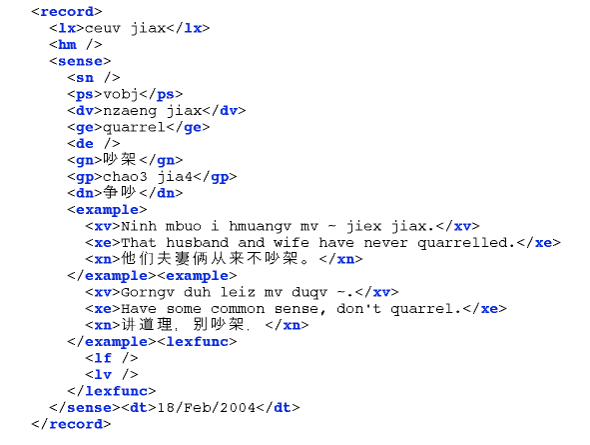

In [162]:
!rm iu_mien_samp.xml

## 11.6 Describing Language Resources using OLAC Metadata

Members of the NLP community have a common need for discovering language resources with high precision and recall. The solution which has been developed by the Digital Libraries community involves metadata aggregation.

### What is Metadata?

The simplest definition of metadata is "structured data about data." Metadata is descriptive information about an object or resource whether it be physical or electronic. While the term metadata itself is relatively new, the underlying concepts behind metadata have been in use for as long as collections of information have been organized. Library catalogs represent a well-established type of metadata; they have served as collection management and resource discovery tools for decades. Metadata can be generated either "by hand" or generated automatically using software.

The Dublin Core Metadata Initiative began in 1995 to develop conventions for resource discovery on the web. The Dublin Core metadata elements represent a broad, interdisciplinary consensus about the core set of elements that are likely to be widely useful to support resource discovery. The Dublin Core consists of 15 metadata elements, where each element is optional and repeatable: Title, Creator, Subject, Description, Publisher, Contributor, Date, Type, Format, Identifier, Source, Language, Relation, Coverage, Rights. This metadata set can be used to describe resources that exist in digital or traditional formats.

The Open Archives initiative (OAI) provides a common framework across digital repositories of scholarly materials regardless of their type, including documents, data, software, recordings, physical artifacts, digital surrogates, and so forth. Each repository consists of a network accessible server offering public access to archived items. Each item has a unique identifier, and is associated with a Dublin Core metadata record (and possibly additional records in other formats). The OAI defines a protocol for metadata search services to "harvest" the contents of repositories.

### OLAC: Open Language Archives Community

The Open Language Archives Community (OLAC) is an international partnership of institutions and individuals who are creating a worldwide virtual library of language resources by:

1. Developing consensus on best current practice for the digital archiving of language resources;
2. Developing a network of interoperating repositories and services for housing and accessing such resources.

OLAC's home on the web is at http://www.language-archives.org/.

OLAC Metadata is a standard for describing language resources. Uniform description across repositories is ensured by limiting the values of certain metadata elements to the use of terms from controlled vocabularies. OLAC metadata can be used to describe data and tools, in both physical and digital formats. OLAC metadata extends the Dublin Core Metadata Set, a widely accepted standard for describing resources of all types. To this core set, OLAC adds descriptors to cover fundamental properties of language resources, such as subject language and linguistic type. Here's an example of a complete OLAC record:

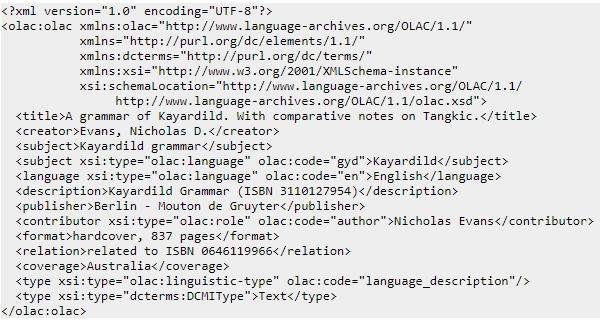

Participating language archives publish their catalogs in an XML format, and these records are regularly "harvested" by OLAC services using the OAI protocol. In addition to this software infrastructure, OLAC has documented a series of best practices for describing language resources, through a process that involved extended consultation with the language resources community (e.g. see http://www.language-archives.org/REC/bpr.html).

OLAC repositories can be searched using a query engine on the OLAC website. Searching for "German lexicon" finds the following resources, amongst others:

- CALLHOME German Lexicon http://www.language-archives.org/item/oai:www.ldc.upenn.edu:LDC97L18
- MULTILEX multilingual lexicon http://www.language-archives.org/item/oai:elra.icp.inpg.fr:M0001
- Slelex Siemens Phonetic lexicon http://www.language-archives.org/item/oai:elra.icp.inpg.fr:S0048

Searching for "Korean" finds a newswire corpus, a treebank, a lexicon, a child-language corpus, interlinear glossed texts. It also finds software including a syntactic analyzer and a morphological analyzer.

Observe that the above URLs include a substring of the form: oai:www.ldc.upenn.edu:LDC97L18. This is an OAI identifier, using a URI scheme registered with ICANN (the *Internet Corporation for Assigned Names and Numbers*). These identifiers have the format *oai*:*archive*:*local_id*, where *oai* is the name of the URI scheme, *archive* is an archive identifier such as www.ldc.upenn.edu, and *local_id* is the resource identifier assigned by the archive, e.g. LDC97L18.

Given an OAI identifier for an OLAC resource, it is possible to retrieve the complete XML record for the resource using a URL of the following form:

### Disseminating Language Resources

The Linguistic Data Consortium hosts the **NLTK Data Repository**, an open-access archive where community members can upload corpora and saved models. These resources can be easily accessed using NLTK's downloader tool.